<a href="https://colab.research.google.com/github/DLPietro/custody-nav-calculator/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Total Portfolio Value: $139,843.25
Cash: $5,000.00
NAV: $144,343.25
NAV per Share: $144.34


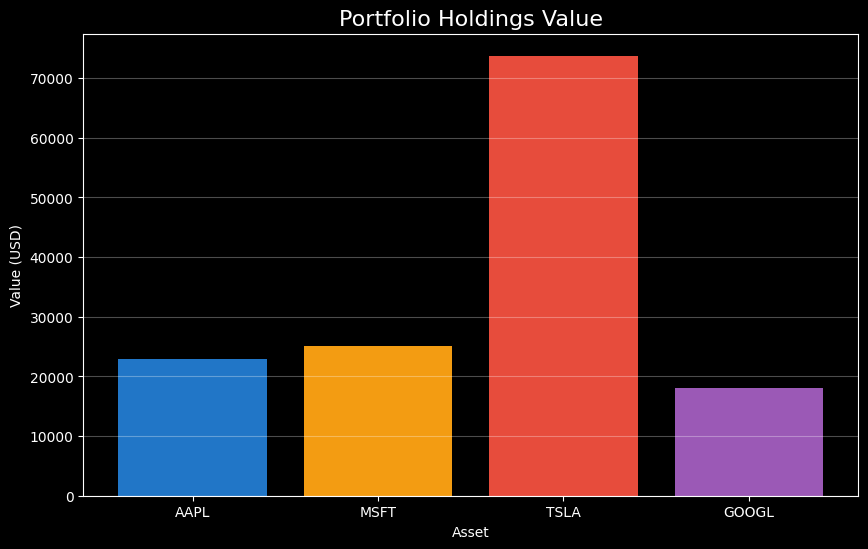

In [1]:
### Custody NAV Calculator
### Test to automate manual NAV reporting in custody operations.

# Step 1: Importing modules/libraries
import pandas as pd, yfinance as yf, matplotlib.pyplot as plt
plt.style.use('dark_background')      # Style chosen

# Step 2: Creating a sample portfolio with Ticker and number of Shares
portfolio_client = pd.DataFrame({
    'ticker': ['AAPL', 'MSFT', 'TSLA', 'GOOGL'],
    'shares': [100, 50, 200, 75]
})

# Step 3: Getting current market prices
portfolio_client['price'] = [yf.Ticker(t).history(period="1d")['Close'].iloc[-1] for t in portfolio_client['ticker']]            # Last price available
portfolio_client['value'] = portfolio_client['shares'] * portfolio_client['price']                                                      # Portfolio Value Calculator, column added

# Step 4: Calculating NAV merging more assets, such as cash or licenses
total_value = portfolio_client['value'].sum()
cash = 5000  # Cash in the fund
liabilities = 500
total_nav = total_value + cash - liabilities                                                                  # Total NAV
shares_outstanding = 1000                                                                                     # Number of shares
nav_per_share = total_nav / shares_outstanding                                                                # NAV per unit of share

# Step 5: Printing Output
print(f"Total Portfolio Value: ${total_value:,.2f}")
print(f"Cash: ${cash:,.2f}")
print(f"NAV: ${total_nav:,.2f}")
print(f"NAV per Share: ${nav_per_share:.2f}")

# Step 6: plot
plt.figure(figsize=(10, 6))
bars = plt.bar(portfolio_client['ticker'], portfolio_client['value'], color=['#2176C7', '#F39C12', '#E74C3C', '#9B59B6'])
plt.title('Portfolio Holdings Value', fontsize=16, color='white')
plt.ylabel('Value (USD)', color='white')
plt.xlabel('Asset', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.grid(axis='y', alpha=0.3)


# Step 7: Save to CSV
portfolio_client.to_csv('current_holdings.csv', index=False)